In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import os
from surprise import SVD
from surprise import NMF
from surprise import Dataset
# from surprise import evaluate, print_perf
from surprise import Reader
from surprise import KNNBasic
from surprise.model_selection.split import KFold
from surprise.model_selection import cross_validate

In [2]:
folds = KFold(n_splits = 3, random_state = 0)

In [3]:
outputs = {}

# Question 3

In [4]:
file_path = os.path.expanduser('restaurant_ratings.txt')
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(file_path, reader=reader)

# Question 5 SVD

In [5]:
algo = SVD()
output1 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
outputs['SVD'] = output1

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9470  0.9407  0.9520  0.9466  0.0046  
MAE (testset)     0.7463  0.7413  0.7507  0.7461  0.0039  
Fit time          7.93    7.91    7.78    7.88    0.07    
Test time         0.62    0.57    0.57    0.59    0.02    


# Question 6 PMF

In [6]:
algo = SVD(biased=False)
output2 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
outputs['PMF'] = output2

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9684  0.9636  0.9774  0.9698  0.0057  
MAE (testset)     0.7636  0.7595  0.7703  0.7645  0.0044  
Fit time          7.69    8.03    7.95    7.89    0.15    
Test time         0.49    0.46    0.44    0.46    0.02    


# Question 7 NMF

In [7]:
algo = NMF()
output3 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
outputs['NMF'] = output3

Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9757  0.9709  0.9824  0.9763  0.0047  
MAE (testset)     0.7656  0.7618  0.7745  0.7673  0.0053  
Fit time          8.57    11.37   13.24   11.06   1.92    
Test time         0.52    1.06    0.65    0.74    0.23    


# Question 8 RMSE and MAE of User based

In [8]:
algo = KNNBasic(sim_options = { 'user_based': True })
output4 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
outputs['UBCF'] = output4

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9941  0.9832  0.9926  0.9899  0.0048  
MAE (testset)     0.7841  0.7760  0.7857  0.7820  0.0043  
Fit time          0.49    0.39    0.37    0.42    0.05    
Test time         13.52   11.83   11.98   12.45   0.76    


# Question 9 RMSE and MAE of Item based

In [9]:
algo = KNNBasic(sim_options = { 'user_based': False })
output5 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
outputs['IBCF'] = output5

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9872  0.9787  0.9937  0.9865  0.0061  
MAE (testset)     0.7813  0.7754  0.7863  0.7810  0.0045  
Fit time          0.67    0.87    0.75    0.76    0.08    
Test time         11.80   12.91   11.89   12.20   0.50    


### To form a dataframe of all obtained outputs

In [14]:
def form_comparison_table(outputs):
    data = {'Fold 1 RMSE': [],'Fold 1 MAE': [], 'Fold 2 RMSE': [], 'Fold 2 MAE': [], 'Fold 3 RMSE': [], 'Fold 3 MAE': []}
    
    for i, alg in enumerate(outputs.keys()):
        data['Fold 1 RMSE'].append(outputs[alg]['test_rmse'][0])
        data['Fold 1 MAE'].append(outputs[alg]['test_mae'][0])
        data['Fold 2 RMSE'].append(outputs[alg]['test_rmse'][1])
        data['Fold 2 MAE'].append(outputs[alg]['test_mae'][1])
        data['Fold 3 RMSE'].append(outputs[alg]['test_rmse'][2])
        data['Fold 3 MAE'].append(outputs[alg]['test_mae'][2])

    df = pd.DataFrame(data, index = outputs.keys())
    
    df['Avg RMSE'] = (df['Fold 1 RMSE'] + df['Fold 2 RMSE'] + df['Fold 3 RMSE']) / 3
    df['Avg MAE'] = (df['Fold 1 MAE'] + df['Fold 2 MAE'] + df['Fold 3 MAE']) / 3

    return df

# Question 10 11 12 13 Comparison of MAE RMSE values based on Average values

In [15]:
comparisontable = form_comparison_table(outputs)
comparisontable

,Fold 1 MAE,Fold 1 RMSE,Fold 2 MAE,Fold 2 RMSE,Fold 3 MAE,Fold 3 RMSE,Avg RMSE,Avg MAE
SVD,0.746322,0.946958,0.741266,0.940684,0.750719,0.952042,0.946561,0.746102
NMF,0.765593,0.975657,0.761849,0.970900,0.774550,0.982428,0.976328,0.767331
IBCF,0.781349,0.987246,0.775426,0.978683,0.786314,0.993656,0.986528,0.781030
UBCF,0.784130,0.994084,0.775987,0.983170,0.785744,0.992551,0.989935,0.781954
PMF,0.763571,0.968450,0.759543,0.963615,0.770309,0.977417,0.969827,0.764474


In [18]:
import matplotlib.pyplot as plt

def plotterfortable(df, col):
    plt.plot(df[col])
    plt.title('{} between recommender system algorithms'.format(col))
    plt.show()

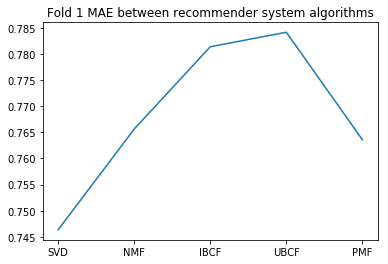

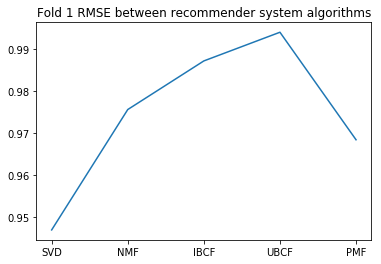

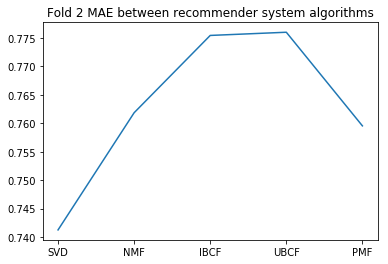

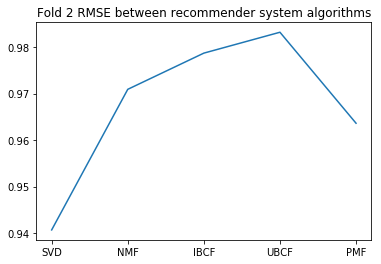

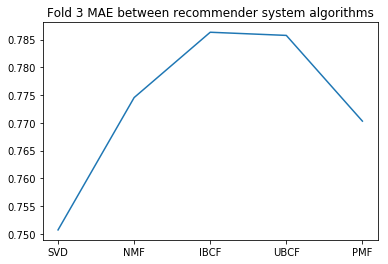

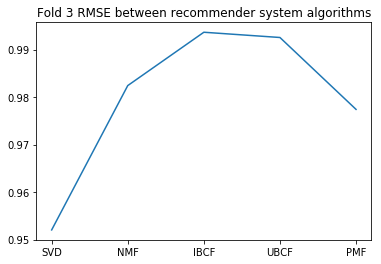

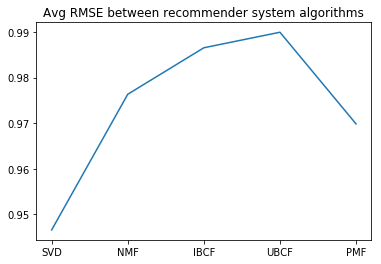

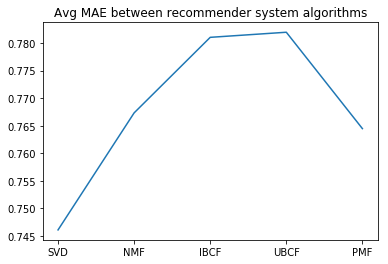

In [19]:
for col in comparisontable.columns:
    plotterfortable(comparisontable, col)

In [31]:
UBCF = {}
IBCF = {}

In [32]:
algo = KNNBasic(sim_options = {'name': 'cosine', 'user_based': True })
output = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
UBCF['Cosine User Based CF'] = output

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0260  1.0163  1.0253  1.0225  0.0044  
MAE (testset)     0.8112  0.8031  0.8137  0.8093  0.0045  
Fit time          0.70    0.70    0.56    0.66    0.07    
Test time         3.58    3.77    3.27    3.54    0.21    


In [33]:
algo = KNNBasic(sim_options = {'name': 'cosine', 'user_based': False })
output = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
IBCF['Cosine Item Based CF'] = output

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0361  1.0313  1.0434  1.0369  0.0050  
MAE (testset)     0.8217  0.8196  0.8275  0.8229  0.0034  
Fit time          1.08    1.27    1.17    1.17    0.08    
Test time         3.65    3.68    3.88    3.74    0.10    


In [34]:
algo = KNNBasic(sim_options = {'name': 'MSD', 'user_based': True })
output = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
UBCF['MSD User Based CF'] = output

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9941  0.9832  0.9926  0.9899  0.0048  
MAE (testset)     0.7841  0.7760  0.7857  0.7820  0.0043  
Fit time          0.16    0.15    0.15    0.15    0.01    
Test time         3.28    3.46    3.23    3.32    0.10    


In [35]:
algo = KNNBasic(sim_options = {'name': 'MSD', 'user_based': False })
output = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
IBCF['MSD Item Based CF'] = output

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9872  0.9787  0.9937  0.9865  0.0061  
MAE (testset)     0.7813  0.7754  0.7863  0.7810  0.0045  
Fit time          0.27    0.29    0.25    0.27    0.02    
Test time         3.96    3.67    3.98    3.87    0.14    


In [36]:
algo = KNNBasic(sim_options = {'name': 'pearson', 'user_based': True })
output = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
UBCF['Pearson User Based CF'] = output

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0250  1.0123  1.0244  1.0206  0.0059  
MAE (testset)     0.8115  0.8030  0.8145  0.8097  0.0049  
Fit time          0.98    0.87    0.87    0.91    0.05    
Test time         3.46    3.30    3.24    3.33    0.09    


In [37]:
algo = KNNBasic(sim_options = {'name': 'pearson', 'user_based': False })
output = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = folds, verbose = True)
IBCF['Pearson Item Based CF'] = output

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0479  1.0439  1.0564  1.0494  0.0052  
MAE (testset)     0.8380  0.8370  0.8446  0.8399  0.0034  
Fit time          1.60    1.49    1.47    1.52    0.06    
Test time         3.56    3.65    3.62    3.61    0.04    


In [38]:
UBCFcomparisontable = form_comparison_table(UBCF)
UBCFcomparisontable

,Fold 1 MAE,Fold 1 RMSE,Fold 2 MAE,Fold 2 RMSE,Fold 3 MAE,Fold 3 RMSE,Avg RMSE,Avg MAE
Pearson User Based CF,0.811530,1.024990,0.802967,1.012281,0.814498,1.024415,1.020562,0.809665
Cosine User Based CF,0.811239,1.026034,0.803096,1.016334,0.813669,1.025265,1.022544,0.809335
MSD User Based CF,0.784130,0.994084,0.775987,0.983170,0.785744,0.992551,0.989935,0.781954


In [39]:
IBCFcomparisontable = form_comparison_table(IBCF)
IBCFcomparisontable

,Fold 1 MAE,Fold 1 RMSE,Fold 2 MAE,Fold 2 RMSE,Fold 3 MAE,Fold 3 RMSE,Avg RMSE,Avg MAE
Pearson Item Based CF,0.837989,1.047893,0.836957,1.043950,0.844606,1.056421,1.049421,0.839851
MSD Item Based CF,0.781349,0.987246,0.775426,0.978683,0.786314,0.993656,0.986528,0.781030
Cosine Item Based CF,0.821702,1.036073,0.819562,1.031298,0.827496,1.043352,1.036908,0.822920


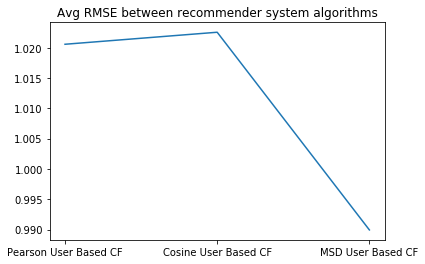

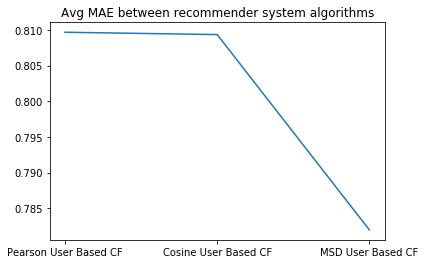

In [46]:
plotterfortable(UBCFcomparisontable, 'Avg RMSE')
plotterfortable(UBCFcomparisontable, 'Avg MAE')

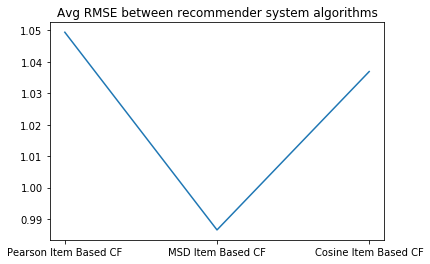

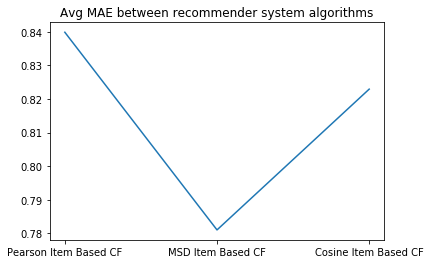

In [47]:
plotterfortable(IBCFcomparisontable, 'Avg RMSE')
plotterfortable(IBCFcomparisontable, 'Avg MAE')

In [48]:
UBCF_outputs = {}
IBCF_outputs = {}

# Question 14 User based collaborative filtering for neighbors k 1 to 50

In [49]:
for i in range(0, 50):
    algo = KNNBasic(k = i, sim_options={'user_based': True})

    output = cross_validate(algo, data, measures=['MAE', 'RMSE'], 
                   cv=folds, verbose=False)

    UBCF_outputs[str(i)] = output

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

# Question 15 Item based collaborative filtering for neighbors k 1 to 50

In [50]:
for i in range(0, 50):
    algo = KNNBasic(k = i, sim_options={'user_based': False })

    output = cross_validate(algo, data, measures=['MAE', 'RMSE'], 
                   cv=folds, verbose=False)

    IBCF_outputs[str(i)] = output

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

In [52]:
user_based_df = form_comparison_table(UBCF_outputs)
item_based_df = form_comparison_table(IBCF_outputs)

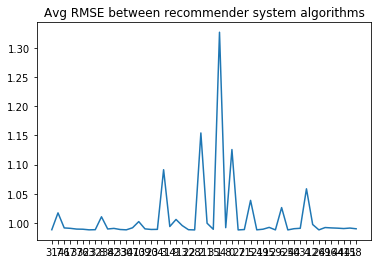

Avg RMSE    25
dtype: object

In [56]:
plotterfortable(user_based_df, 'Avg RMSE')
user_based_df[['Avg RMSE']].idxmin()

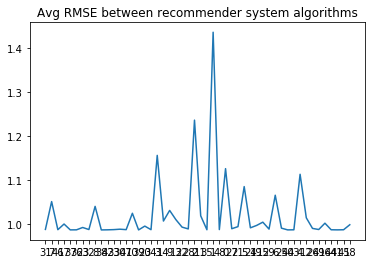

Avg RMSE    38
dtype: object

In [57]:
plotterfortable(item_based_df, 'Avg RMSE')
item_based_df[['Avg RMSE']].idxmin()

User based collaborative filtering gives the minimum error for k = 25 and Item based collaborative filtering gives the minimum error for k = 38